In [266]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)  
x_val = np.expand_dims(x_val, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

The shape of training set: (48000, 28, 28, 1)


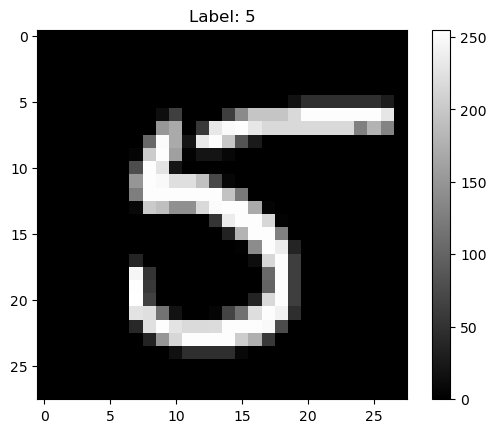

In [269]:
# training set has 60000 rows, and each is an image having 28x28 pixels. 
print(f"The shape of training set: {x_train.shape}")

plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.colorbar()
plt.show()

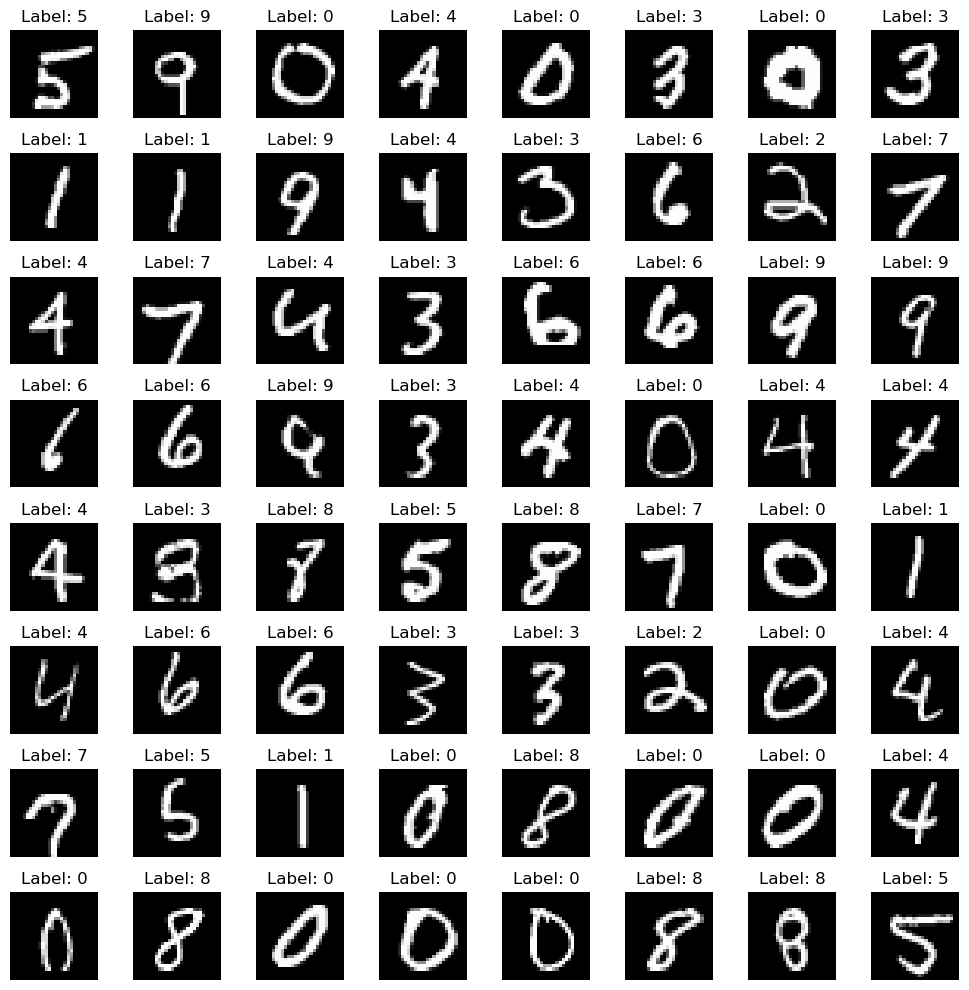

In [270]:
# randomly pick 64 images, and demo in a 8x8 grid
indices = np.random.choice(len(x_train), 64, replace=False)
selected_images = x_train[indices]
selected_label = y_train[indices]

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(selected_images[i], cmap='gray')
    ax.set_title(f"Label: {selected_label[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [271]:
# normalization for X
# scale pixel value from [0-255] to [0-1]
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [272]:
# one-hot encode for y
# transform the category label from string (e.g. 2) to vector (e.g. [0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [273]:
# try the common MLP model
tf.random.set_seed(1234)

model_mlp = Sequential([
    tf.keras.Input(shape=(28,28,1)),
    Flatten(), 
    Dense(units=32, activation='relu', name='L1'), 
    # Dense(units=128, activation='relu', kernel_regularizer=l2(0.01), name='L1'), 
    # Dropout(0.1),
    Dense(units=16, activation='sigmoid', name='L2'),
    # Dense(units=64, activation='sigmoid', kernel_regularizer=l2(0.01), name='L2'),
    # Dropout(0.1),
    Dense(units=10, activation='softmax', name='L3')
], name='MLP')

model_mlp.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L1 (Dense)                      │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,818 (100.85 KB)

 Trainable params: 25,818 (100.85 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:


model_mlp.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss="CategoricalCrossentropy", 
    # loss=focal_loss(gamma=2.0, alpha=0.25),
    metrics=['accuracy']
)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True
)

history = model_mlp.fit(
    x_train, 
    y_train,
    epochs=20, 
    batch_size=32, 
    validation_data=(x_val, y_val), 
    callbacks=[early_stopping]
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7319 - loss: 1.1686 - val_accuracy: 0.9260 - val_loss: 0.3096
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9308 - loss: 0.2715 - val_accuracy: 0.9422 - val_loss: 0.2062
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9477 - loss: 0.1910 - val_accuracy: 0.9504 - val_loss: 0.1720
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9571 - loss: 0.1556 - val_accuracy: 0.9557 - val_loss: 0.1553
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9626 - loss: 0.1328 - val_accuracy: 0.9588 - val_loss: 0.1453
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9676 - loss: 0.1163 - val_accuracy: 0.9605 - val_loss: 0.1402
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9703 - loss: 0.1038 - val_accuracy: 0.9606 - val_loss: 0.1372
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9725 - loss: 0.0940 - 

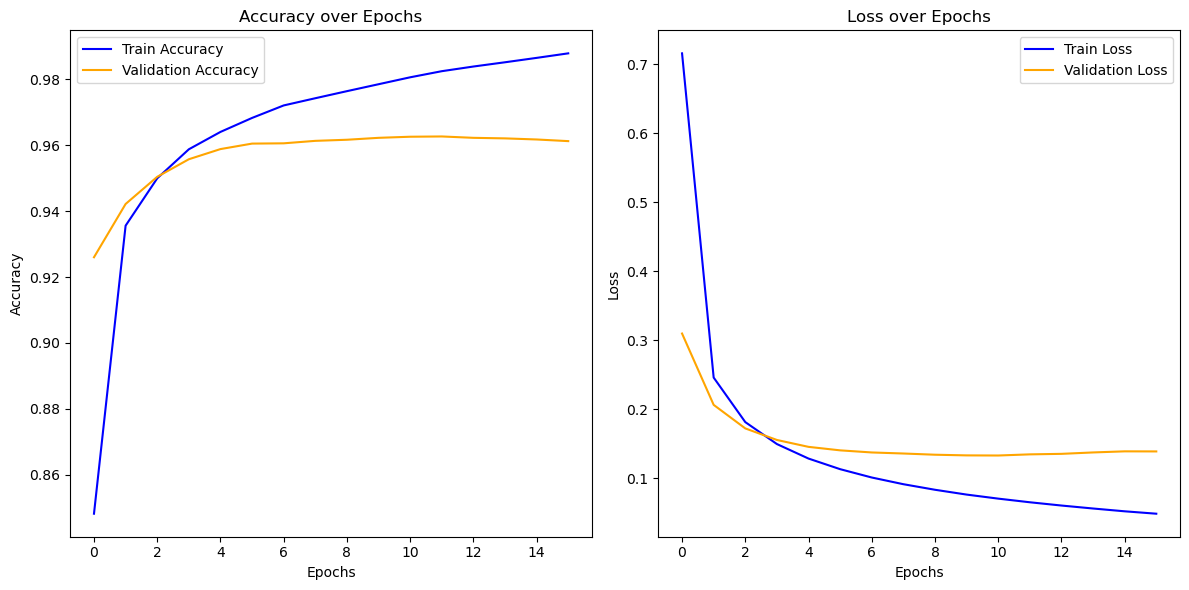

In [ ]:

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [277]:
test_loss, test_accuracy = model_mlp.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9537 - loss: 0.1485
Test Accuracy: 0.9603000283241272, Test Loss: 0.1281992346048355


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


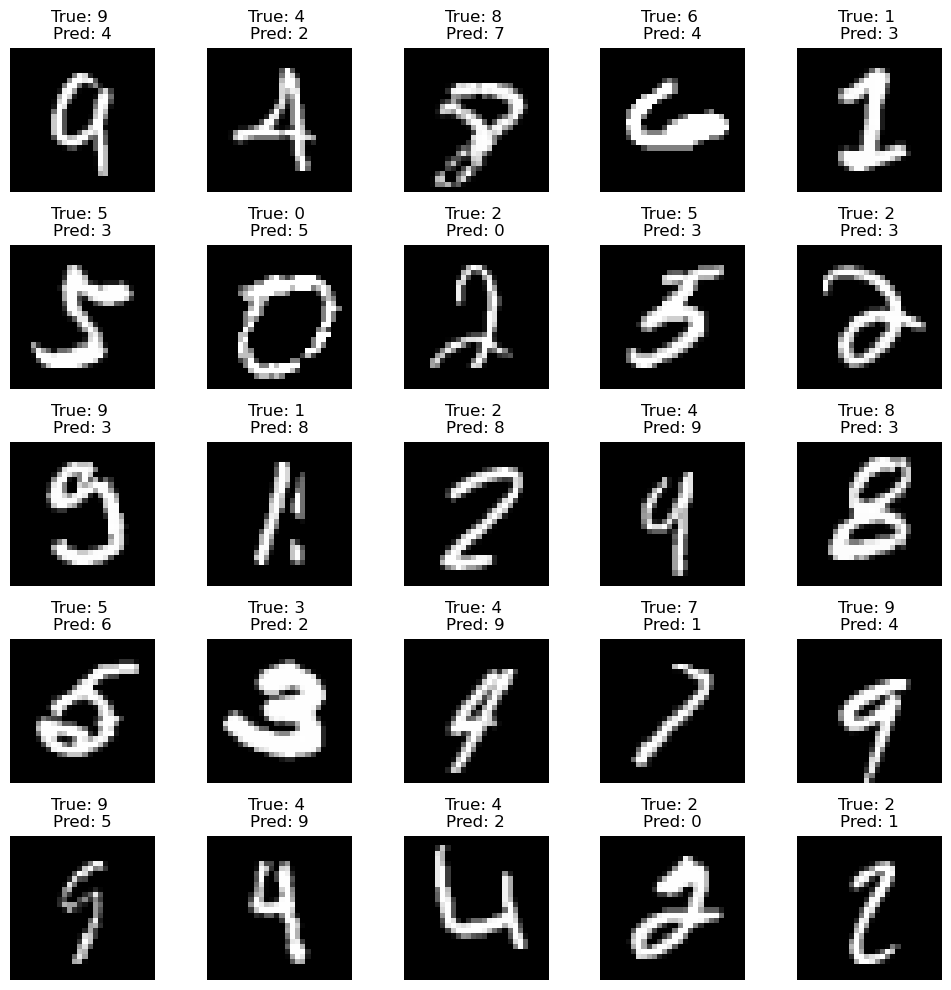

In [ ]:

y_pred_probs = model_mlp.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

incorrect_indices = np.where(y_pred != y_true)[0]
selected_incorrect_indices = np.random.choice(incorrect_indices, 25, replace=False)

incorrect_images = x_test[selected_incorrect_indices]
incorrect_true_labels = y_true[selected_incorrect_indices]
incorrect_pred_labels = y_pred[selected_incorrect_indices]

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(incorrect_images[i].squeeze(), cmap='gray')
    ax.set_title(f"True: {incorrect_true_labels[i]} \nPred: {incorrect_pred_labels[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()
